# Key descriptive statistics:

* Mean, mode, median = obvious
* Variance: describes how much each point varies from the mean. Python code: sum([(i - mean) ** 2 for i in list])/len(list)
* Standard deviation: sqrt of variance. Python code: var ** 0.5
* Covariance: describes how much two continuous variables *vary* together (i.e., when one is far from the mean is other far from the mean).  Python code: sum([(x[i] - mean_x) * (y[i] - mean_y) for i in range(len(x))])/(len(list)-1)
* Pearson correlation coefficient: measure of linear correlation between 2 variables, ranges from -1 to 1.  Calculated by dividing covariance by product of each stddev.  Python code: covar / (stdev_x * stdev_y).

# Linear regression

* Slope = covariance(x,y) / var(x).
  * Python code (assumes x is series object):
  * from numpy import cov
  * cov(x,y)[0,1] / x.var()
* Y-intercept = mean_y - (mean_x * slope)
* Sum of squared residuals = sum([(predicted_y[i] - y[i]) ** 2 for i in range(len(y))])
* Standard error = square root( sum of squared residuals / (n-2)).  Python code: (rss/(n-2)) ** 0.5

# Distributions and sampling

Dataset: us_income.csv - income demographics by county 

Columns - 
* id -- the county id.
* county -- the name and state of the county.
* pop_over_25 -- the number of adults over age 25.
* median_income -- the median income for residents over age 25 in the county.
* median_income_no_hs -- median income for residents without a high school education.
* median_income_hs -- median income for high school graduates who didn't go to college.
* median_income_some_college -- median income for residents who went to college but didn't graduate.
* median_income_college -- median income for college graduates.
* median_income_graduate_degree -- median income for those with a masters or other graduate degree.

In [2]:
import pandas as pd

income = pd.read_csv('data/us_income.csv')

In [3]:
lowest_row = income['median_income'].idxmin()
lowest_income_county = income.loc[lowest_row,'county']
gt_500000 = income[income['pop_over_25'] > 500000]
lowest_income_high_pop_county = gt_500000.loc[gt_500000['median_income'].idxmin(),'county']

In [4]:
import random
random.seed(20)
new_sequence = [random.randint(0,10) for _ in range(10)]

In [7]:
sample_of_5 = random.sample(new_sequence, 5)
print(sample_of_5)

[10, 1, 2, 4, 0]


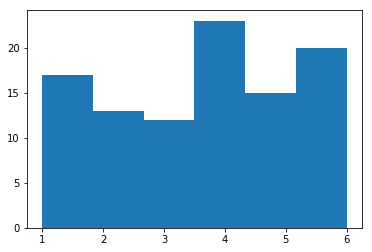

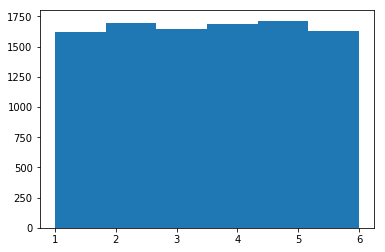

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
def roll():
    return random.randint(1,6)

random.seed(1)
med_sample = [roll() for _ in range(100)]
plt.hist(med_sample, bins=6)
plt.show()

random.seed(1)
large_sample = [roll() for _ in range(10000)]
plt.hist(large_sample,bins=6)
plt.show()


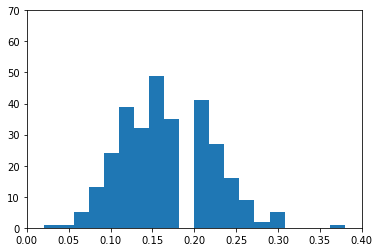

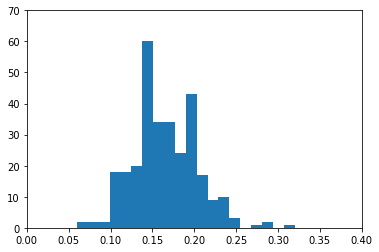

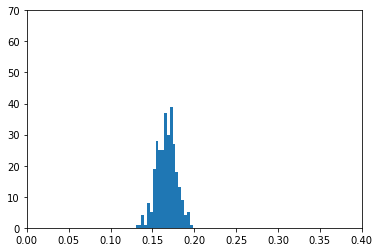

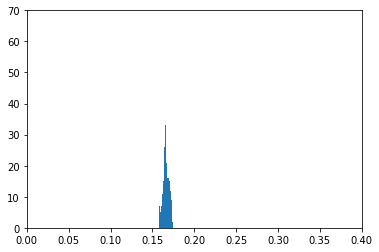

In [26]:
def probability_of_one(num_trials, num_rolls):
    """
    This function will take in the number of trials, and the number of rolls per trial.
    Then it will conduct each trial, and record the probability of rolling a one.
    """

    probabilities = []
    for i in range(num_trials):
        dice_rolls = [roll() for _ in range(num_rolls)]
        num_ones = len([i for i in dice_rolls if i == 1])
        probabilities.append(num_ones/num_rolls)
    return probabilities

random.seed(1)
small_samps = probability_of_one(300, 50)
plt.hist(small_samps,bins=20)
plt.ylim(0,70)
plt.xlim(0,0.4)
plt.show()

random.seed(1)
medium_samps = probability_of_one(300, 100)
plt.hist(medium_samps,bins=20)
plt.ylim(0,70)
plt.xlim(0,0.4)
plt.show()

random.seed(1)
large_samps = probability_of_one(300,1000)
plt.hist(large_samps,bins=20)
plt.ylim(0,70)
plt.xlim(0,0.4)
plt.show()

random.seed(1)
very_large_samps = probability_of_one(300,10000)
plt.hist(very_large_samps,bins=20)
plt.ylim(0,70)
plt.xlim(0,0.4)
plt.show()

As sample size grows, notice how much tighter the distribution is

In [28]:
import numpy

large_sample_std = numpy.std(large_sample)

large_sample_mean = numpy.mean(large_sample)

deviations_from_mean = (0.18 - large_sample_mean)/large_sample_std

over_18_count = len([i for i in large_sample if i >= 0.18])

31063.09385937003


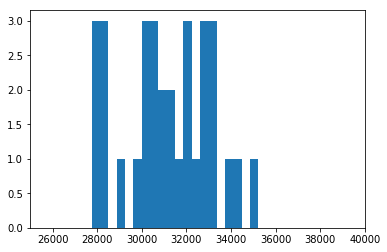

31050.101990000003


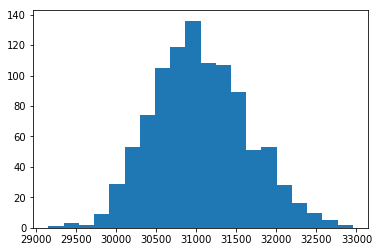

In [50]:
# This is the mean median income in any US county.
mean_median_income = income["median_income"].mean()
print(mean_median_income)

def get_sample_mean(start, end):
    return income["median_income"][start:end].mean()

def find_mean_incomes(row_step):
    mean_median_sample_incomes = []
    # Iterate over the indices of the income rows
    # Starting at 0, and counting in blocks of row_step (0, row_step, row_step * 2, etc).
    for i in range(0, income.shape[0], row_step):
        # Find the mean median for the row_step counties from i to i+row_step.
        mean_median_sample_incomes.append(get_sample_mean(i, i+row_step))
    return mean_median_sample_incomes

nonrandom_sample = find_mean_incomes(100)
plt.hist(nonrandom_sample, 20)
plt.xlim(25000,40000)
plt.show()

# What you're seeing above is the result of biased sampling.
# Instead of selecting randomly, we selected counties that were next to each other in the data.
# This picked counties in the same state more often that not, and created means that didn't represent the whole country.
# This is the danger of not using random sampling -- you end up with samples that don't reflect the entire population.
# This gives you a distribution that isn't normal.

import random
def select_random_sample(count):
    """
    Returns a random sample with n=count elements from income
    """
    random_indices = random.sample(range(income.shape[0]),count)
    return income.iloc[random_indices]

random.seed(1)

random_means = [select_random_sample(100)["median_income"].mean() for _ in range(1000)]
print(numpy.mean(random_means))
plt.hist(random_means, bins=20)
plt.show()


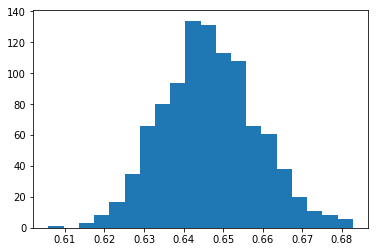

0.6465622532524408


In [51]:
random.seed(1)

random_samples = [select_random_sample(100) for _ in range(1000)]
mean_ratios = [(each["median_income_hs"] / each["median_income_college"]).mean() for each in random_samples]
plt.hist(mean_ratios,bins=20)
plt.show()

print(numpy.mean(mean_ratios))

# Find significance value

Assume we made some change in a sample of 100 counties trying to increase the wages of high school grads vs college grads.  At the end of 5 years the ratio in this sample of counties is 0.675.  What is the significance level of this observation (the likelihood that this value would be obtained by picking a random sample from the population):

In [56]:
gt_675 = len([each for each in mean_ratios if each >= 0.675])
significance_value = gt_675/len(mean_ratios)
print(significance_value)

0.014


Repeating above with sample size of 1000

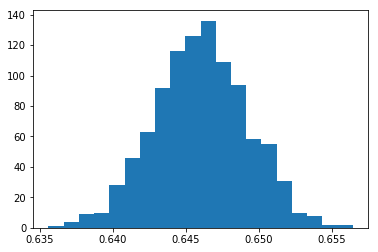

0.6460284006750108


In [57]:
random.seed(1)

random_samples = [select_random_sample(1000) for _ in range(1000)]
mean_ratios = [(each["median_income_hs"] / each["median_income_college"]).mean() for each in random_samples]
plt.hist(mean_ratios,bins=20)
plt.show()

print(numpy.mean(mean_ratios))

In [58]:
gt_675 = len([each for each in mean_ratios if each >= 0.675])
significance_value = gt_675/len(mean_ratios)
print(significance_value)

0.0
